In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

In [4]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

In [6]:
train_images = mnist_train_images.reshape(60000, 784)
test_images = mnist_test_images.reshape(10000, 784)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

Converting to one-hot format

In [7]:
train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

Check one of images

[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


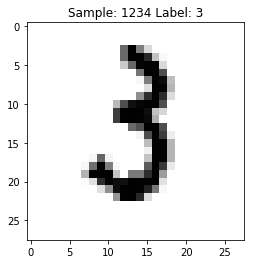

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
def display_sample(num):
    print(train_labels[num])
    label = train_labels[num].argmax(axis=0)
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

display_sample(1234)

In [12]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784, )))
model.add(Dense(10, activation='softmax'))

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [16]:
history = model.fit(train_images, train_labels, batch_size=100, epochs=10, verbose=2, validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
7s - loss: 0.2429 - acc: 0.9302 - val_loss: 0.1272 - val_acc: 0.9599
Epoch 2/10
6s - loss: 0.0978 - acc: 0.9711 - val_loss: 0.0826 - val_acc: 0.9753
Epoch 3/10
6s - loss: 0.0651 - acc: 0.9805 - val_loss: 0.0757 - val_acc: 0.9760
Epoch 4/10
6s - loss: 0.0481 - acc: 0.9853 - val_loss: 0.0651 - val_acc: 0.9792
Epoch 5/10
6s - loss: 0.0363 - acc: 0.9892 - val_loss: 0.0638 - val_acc: 0.9801
Epoch 6/10
6s - loss: 0.0281 - acc: 0.9915 - val_loss: 0.0683 - val_acc: 0.9803
Epoch 7/10
6s - loss: 0.0209 - acc: 0.9940 - val_loss: 0.0656 - val_acc: 0.9814
Epoch 8/10
6s - loss: 0.0167 - acc: 0.9952 - val_loss: 0.0679 - val_acc: 0.9816
Epoch 9/10
6s - loss: 0.0130 - acc: 0.9962 - val_loss: 0.0723 - val_acc: 0.9820
Epoch 10/10
6s - loss: 0.0102 - acc: 0.9970 - val_loss: 0.0730 - val_acc: 0.9823


In [17]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.0729930726283
Test accuracy: 0.9823


In [ ]:
for x in range(1000):
    test_image = test_images[x, :].reshape(1, 784)
    predicted_cat = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if predicted_cat != label:
        plt.title('Prediction: %d Label %d' % (predicted_cat, label))
        plt.ims